In [1]:
import yaml
import sys
import os
import numpy as np
import torch 
os.chdir('/home/jonfrey/PLR3')
sys.path.insert(0, os.getcwd())
sys.path.append(os.path.join(os.getcwd() + '/src'))
sys.path.append(os.path.join(os.getcwd() + '/lib'))

import loaders_v2
from loaders_v2 import GenericDataset
from rotations import * 

exp_cfg_path = '/home/jonfrey/PLR3/yaml/exp/exp_ws_deepim_debug_natrix.yml'
env_cfg_path = '/home/jonfrey/PLR3/yaml/env/env_natrix_jonas.yml'

def load_from_file(p):
    if os.path.isfile(p):
        with open(p, 'r') as f:
            data = yaml.safe_load(f)
    else:
        raise ValueError
    return data

exp = load_from_file(exp_cfg_path)
env = load_from_file(env_cfg_path)

dataset_train = GenericDataset(
    cfg_d=exp['d_train'],
    cfg_env=env)

Start loading meshes
Finished loading meshes 1.8189246654510498


In [2]:
# print( dataset_train._backend.get_camera('data_syn/000001', K=False, idx =True) )
# print( dataset_train._backend.get_camera('data/0068/000001', K=False, idx = True ) )
# real_img.shape
# real_img, render_img
# big2 = np.moveaxis(np.moveaxis( np.concatenate( [real_img.numpy(), render_img.numpy() ], axis=2), 2,1),1,2)
# big2.shape

In [6]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

class Drawer():
    def __init__(self):
        self.im_in_plot = 0
        self.data = []
    def disp_img_1d(self,img,hold=False):
        self.data.append(img)
        
        if not hold:
            fig = plt.figure(figsize=(6*2*len(self.data),7))
            ax = []
            for j,a in enumerate(self.data):
                ax.append( fig.add_subplot(1,len(self.data), j+1)  )
                
                ax[-1].get_xaxis().set_visible(False)
                ax[-1].get_yaxis().set_visible(False)
                pos = ax[-1].imshow( a, cmap='Blues' )
                fig.colorbar(pos, ax=ax[-1])
            plt.show()
            self.data = []
            self.ax = []
            print('SHOW')
visu= Drawer()

In [3]:
batch = dataset_train[10450][0] #bann 10450
points, choose, img, target, model_points, idx = batch[0:6]
depth_img, label_img, img_orig, cam = batch[6:10]
gt_rot_wxyz, gt_trans, unique_desig = batch[10:13]

real_img, render_img, real_d, render_d, gt_label_cropped = batch[13:18]
pred_rot_wxyz, pred_trans, pred_points, h_render, render_img_original = batch[18:23]
u_map, v_map, x_map, y_map, z_map, uu_map, vv_map, bb_real, bb_ren, u_full, v_full, render_res, real_res= batch[23:]

Finished with 2381 matches and within 6000 iteartions, len(out), 50944
LABEL_IMG compard to index  2
Time to get flow 6.070712327957153
Render TL Cor: tensor([ 7., 38.]), BR Cor: tensor([451., 629.]), Widht: 591.0, Height: 444.0
REAL TL Cor: tensor([ -40., -127.], dtype=torch.float64), BR Cor: tensor([411., 473.], dtype=torch.float64), Widht: 600.0, Height: 451.0


/home/jonfrey/PLR3/src/helper/bounding_box.py:269: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  masked_idx = (d != 0).nonzero()


get_rendered_data time 33.18914723396301s
Getitem time: 33.247031450271606


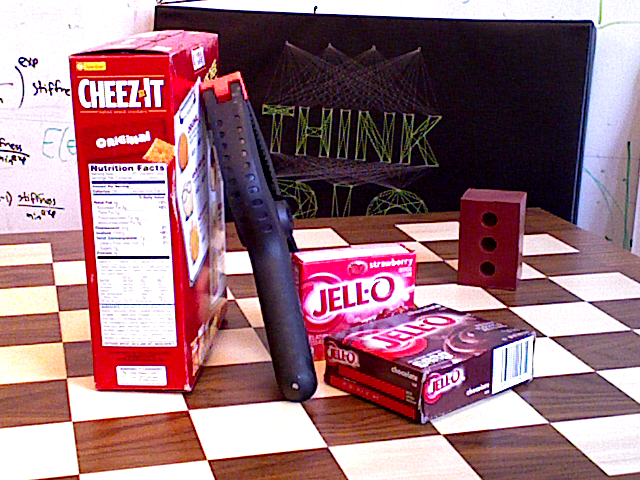

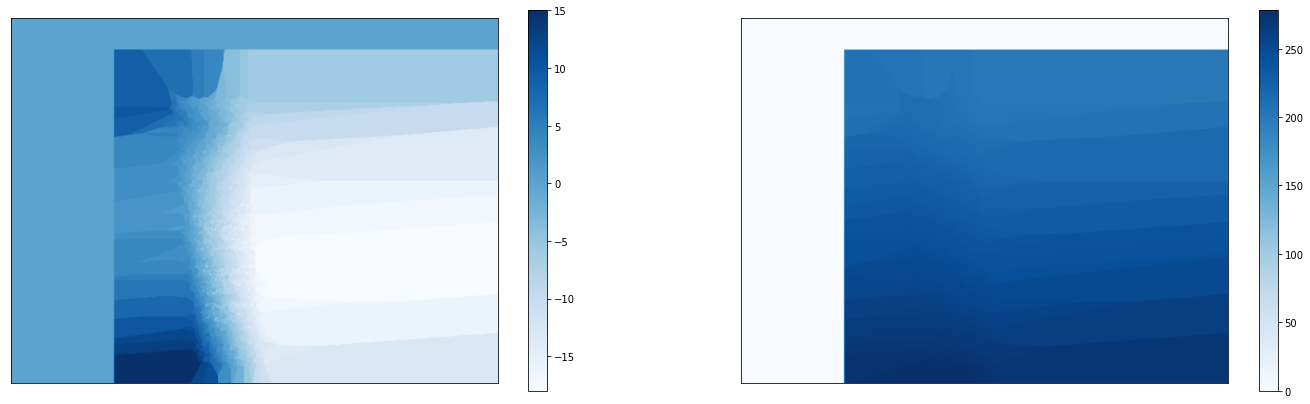

SHOW


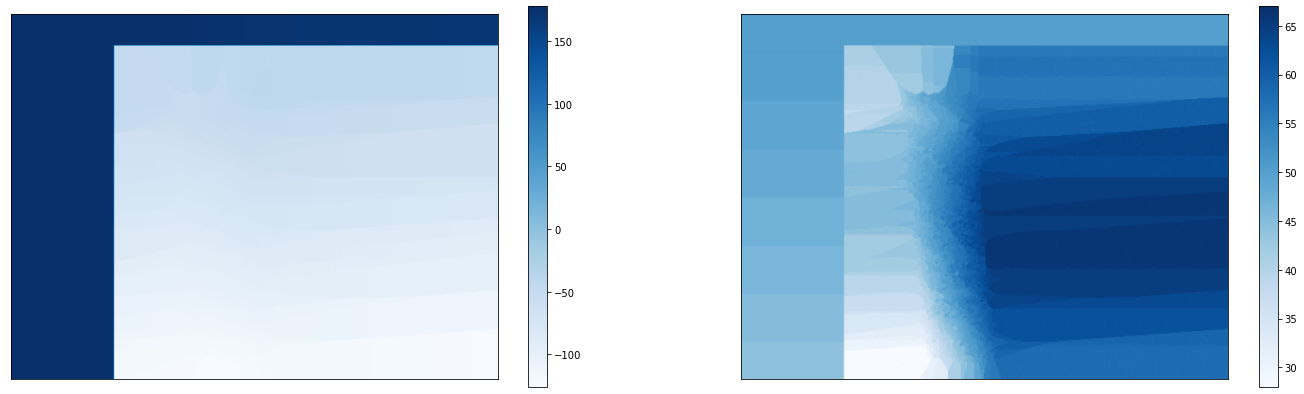

SHOW


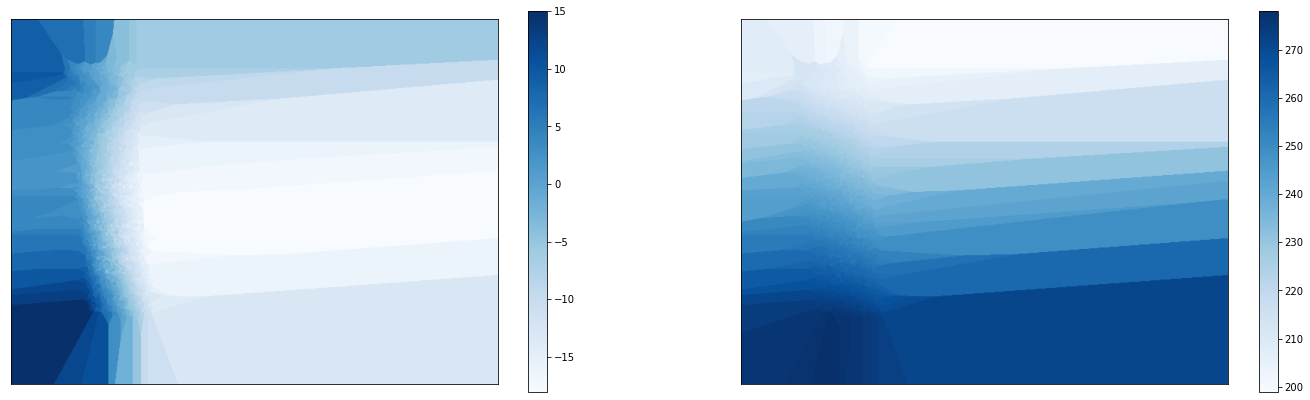

SHOW


In [4]:


visu= Drawer()
 
# visu.disp_img_1d(x_map, True)
# visu.disp_img_1d(y_map, True)
# print(f'xyz_map:, {unique_desig[1]}')
# visu.disp_img_1d(z_map, True)
# print('uv_map:')
visu.disp_img_1d(u_map, True)
visu.disp_img_1d(v_map)


visu.disp_img_1d(uu_map, True)
visu.disp_img_1d(vv_map)

visu.disp_img_1d(u_full, True)
visu.disp_img_1d(v_full)


# visu.disp_img_1d((label_img * (label_img==unique_desig[1])).numpy())
# # display( Image.fromarray(np.uint8(img_orig.numpy())) )
# # display( Image.fromarray(np.uint8(render_img_original.numpy()[0])) )

h,w,c = img_orig.shape
col = (0, 255, 0)
grey = (207, 207, 207)

(480, 1280, 3)
(480, 1280, 3)


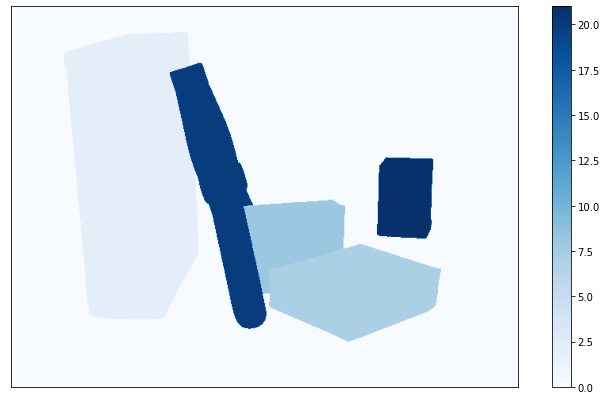

SHOW


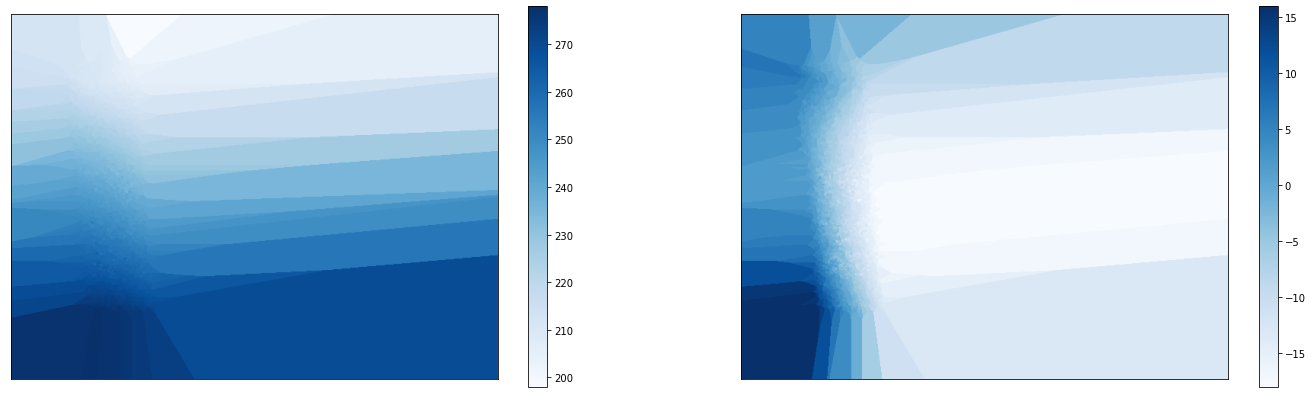

SHOW


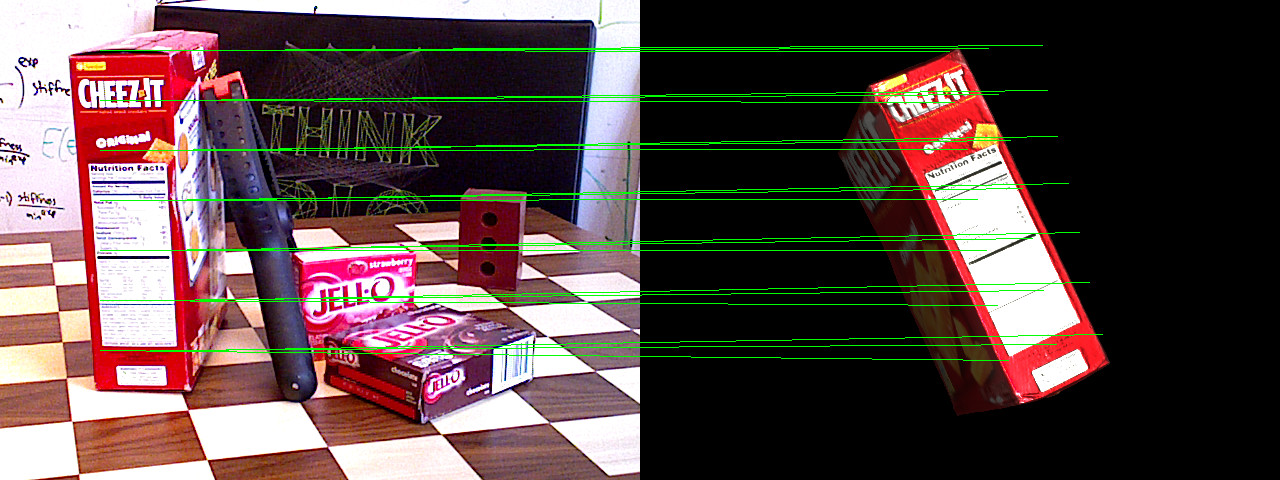

In [36]:


# Render TL Cor: tensor([90., 80.]), BR Cor: tensor([424., 525.]), Widht: 445.0, Height: 334.0
# REAL TL Cor: tensor([165., 191.], dtype=torch.float64), BR Cor: tensor([297., 368.], dtype=torch.float64), Widht: 177.0, Height: 132.0              


# _w_in_cropped_real = 240
# _h_in_cropped_real = 270

# off, s = 191, w/177
# _w_in_real = int ( _w_in_cropped_real/s + off)
# off, s = 165, h/132
# _h_in_real = int( _h_in_cropped_real/s + off)

# _corrospnding_w_in_render = int(_w_in_real + u_map[_h_in_cropped_real,_w_in_cropped_real])
# _corrospnding_h_in_render = int(_h_in_real + v_map[_h_in_cropped_real,_w_in_cropped_real])

# off, s = 80,w/445
# _corrospnding_w_in_cropped_render =int ( off + _corrospnding_w_in_render * s )
# off, s = 90,h/334
# _corrospnding_h_in_cropped_render = int( off + _corrospnding_h_in_render * s )

# print(f'W,H Cropped REAL: {_w_in_cropped_real} | {_h_in_cropped_real}')
# print(f'W,H REAL: {_w_in_real} | {_h_in_real}')
# print(f'W,H Render: {_corrospnding_w_in_render} | {_corrospnding_h_in_render}')
# print(f'W,H Cropped Render: {_corrospnding_w_in_cropped_render} | {_corrospnding_h_in_cropped_render}')
# s = 10
# print(real_img.shape)
# t0 = np.uint8(real_img.permute((1,2,0)).numpy())
# print(t0.shape)
# t0[_h_in_cropped_real:_h_in_cropped_real+s, _w_in_cropped_real:_w_in_cropped_real+s, 0]= 0
# t0[_h_in_cropped_real:_h_in_cropped_real+s, _w_in_cropped_real:_w_in_cropped_real+s, 1] = 255
# t0[_h_in_cropped_real:_h_in_cropped_real+s, _w_in_cropped_real:_w_in_cropped_real+s, 2]= 0
# display( Image.fromarray(t0) )

t1 = np.uint8(img_orig.numpy())
# t1[_h_in_real:_h_in_real+s, _w_in_real:_w_in_real+s, 0]= 0
# t1[_h_in_real:_h_in_real+s, _w_in_real:_w_in_real+s, 1] = 255
# t1[_h_in_real:_h_in_real+s, _w_in_real:_w_in_real+s, 2]= 0
# display( Image.fromarray(t1) )

t2 = np.uint8(render_img_original.numpy()[0])
# print(t2.shape, _corrospnding_h_in_render)
# t2[_corrospnding_h_in_render:_corrospnding_h_in_render+s, _corrospnding_w_in_render:_corrospnding_w_in_render+s, 0] = 0
# t2[_corrospnding_h_in_render:_corrospnding_h_in_render+s, _corrospnding_w_in_render:_corrospnding_w_in_render+s, 1] = 255
# t2[_corrospnding_h_in_render:_corrospnding_h_in_render+s, _corrospnding_w_in_render:_corrospnding_w_in_render+s, 2] = 0
# display( Image.fromarray(t2) )


# t4 = np.uint8(render_img.permute((1,2,0)).numpy())
# print(t2.shape, _corrospnding_h_in_render)
# t4[_corrospnding_h_in_cropped_render:_corrospnding_h_in_cropped_render+s, _corrospnding_w_in_cropped_render:_corrospnding_w_in_cropped_render+s, 0] = 0
# t4[_corrospnding_h_in_cropped_render:_corrospnding_h_in_cropped_render+s, _corrospnding_w_in_cropped_render:_corrospnding_w_in_cropped_render+s, 1] = 255
# t4[_corrospnding_h_in_cropped_render:_corrospnding_h_in_cropped_render+s, _corrospnding_w_in_cropped_render:_corrospnding_w_in_cropped_render+s, 2] = 0
# display( Image.fromarray(t2) )

#Dense Version
big2 = np.swapaxes( np.concatenate( [real_img.numpy(), render_img.numpy() ], axis=2).astype(np.uint8).T,0,1)

bigX = np.concatenate( [ np.swapaxes(real_img.numpy().T,0,1), t2 ], axis=1 ).astype(np.uint8)

big3 = np.concatenate( [t1,t2 ], axis=1)
import copy
big4 = copy.deepcopy( big2 )

print(bigX.shape)
print(big3.shape)
img2 = Image.fromarray(big2)
draw2 = ImageDraw.Draw(img2)

img3 = Image.fromarray(big3)
draw3 = ImageDraw.Draw(img3)

img4 = Image.fromarray(big4)
draw4 = ImageDraw.Draw(img4)

imgX = Image.fromarray(bigX)
drawX = ImageDraw.Draw(imgX)

# for _w in range(0,w,50):
#     for _h in range(0,h,50):
#         if gt_label_cropped[_h,_w] == unique_desig[1] :
#             try:
# #             ren_tl = [48., 97.]
# #             ren_w ,ren_h  = 485.0,  364.0
            
# #             real_tl = [185., 101.]
# #             real_w, real_h = 260.0, 195.0

# #             __w_real = _w/(w/real_w) + real_tl[1]
# #             __h_real = _h/(h/real_h) + real_tl[0]
            
# #             __corrospnding_w_in_render =  __w_real   + int(v_map[_h,_w])
# #             __corrospnding_h_in_render =  __h_real   + int(u_map[_h,_w]) 
# #             __corrospnding_w_in_cropped_render = int( (__corrospnding_w_in_render - ren_tl[1]) * (w/ren_w))
# #             __corrospnding_h_in_cropped_render = int( (__corrospnding_h_in_render - ren_tl[0]) * (h/ren_h)) 
# #             uuu = int( _w - (__corrospnding_w_in_cropped_render) )
# #             vvv = int( _h - (__corrospnding_h_in_cropped_render) )
            
#                 vvv = vv_map[_h,_w]
#                 uuu = uu_map[_h,_w]
#     #             draw3.line([(__w_real, __h_real), (int(__corrospnding_w_in_render +640), int(__corrospnding_h_in_render ))],
#     #               fill=col, width=1)
#                 draw4.line([(_w, _h), (int(_w +640 + uuu), _h+ vvv)],
#                   fill=col, width=1)
#                 drawX.line([(_w, _h), (int(_w +640 + uuu), _h+ vvv)],
#                   fill=col, width=1)
                
visu.disp_img_1d(label_img)
visu.disp_img_1d(v_full, True)
visu.disp_img_1d(u_full)
for _w in range(0,w,50):
    for _h in range(0,h,50):       
        if label_img[_h,_w] == unique_desig[1]:
            try:
                vvv = u_full[_h,_w]
                uuu = v_full[_h,_w]
                draw3.line([(_w, _h), (int(_w +640 + uuu), _h + vvv)],
                  fill=col, width=1)
            except:
                pass
display(img3)

In [1]:
import yaml
import sys
import os
import numpy as np
import torch 
os.chdir('/home/jonfrey/PLR3')
sys.path.insert(0, os.getcwd())
sys.path.append(os.path.join(os.getcwd() + '/src'))
sys.path.append(os.path.join(os.getcwd() + '/lib'))

import loaders_v2
from loaders_v2 import GenericDataset
from rotations import * 

exp_cfg_path = '/home/jonfrey/PLR3/yaml/exp/exp_ws_deepim_debug_natrix.yml'
env_cfg_path = '/home/jonfrey/PLR3/yaml/env/env_natrix_jonas.yml'

def load_from_file(p):
    if os.path.isfile(p):
        with open(p, 'r') as f:
            data = yaml.safe_load(f)
    else:
        raise ValueError
    return data

exp = load_from_file(exp_cfg_path)
env = load_from_file(env_cfg_path)

dataset_train = GenericDataset(
    cfg_d=exp['d_train'],
    cfg_env=env)

batch = dataset_train[10450][0] #bann 10450
points, choose, img, target, model_points, idx = batch[0:6]
depth_img, label_img, img_orig, cam = batch[6:10]
gt_rot_wxyz, gt_trans, unique_desig = batch[10:13]

real_img, render_img, real_d, render_d, gt_label_cropped = batch[13:18]
pred_rot_wxyz, pred_trans, pred_points, h_render_in, render_img_original = batch[18:23]
u_map, v_map, x_map, y_map, z_map, uu_map, vv_map, bb_real, bb_ren, u_full, v_full, render_res, real_res, mask_valid= batch[23:]


import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

class Drawer():
    def __init__(self):
        self.im_in_plot = 0
        self.data = []
    def disp_img_1d(self,img,hold=False):
        self.data.append(img)
        
        if not hold:
            fig = plt.figure(figsize=(6*2*len(self.data),7))
            ax = []
            for j,a in enumerate(self.data):
                ax.append( fig.add_subplot(1,len(self.data), j+1)  )
                
                ax[-1].get_xaxis().set_visible(False)
                ax[-1].get_yaxis().set_visible(False)
                pos = ax[-1].imshow( a, cmap='Blues' )
                fig.colorbar(pos, ax=ax[-1])
            plt.show()
            self.data = []
            self.ax = []
            print('SHOW')


h = 480
w = 640

from visu import plot_pcd, Visualizer
import copy
from scipy.spatial.transform import Rotation as R
from helper import re_quat
from PIL import Image, ImageDraw

def transform_mesh(data, H):
        """ directly operates on mesh and does not create a copy!"""
        t = np.ones((data.shape[0],4)) 
        t[:,:3] = data
        data = (t @ H.T)[:,:3]
        return data
    
visu= Drawer()
visualizer = Visualizer(p_visu='home/jonfrey/Debug')   

Start loading meshes
Finished loading meshes 1.7692158222198486
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 21412
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 2304
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 33131
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 26931
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 45971
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 22796
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 45222
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 

(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 5370
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 33274
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 31033
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 550
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 2603
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 33655
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 17796
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 40466
(arr

(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 1304
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 14662
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 44329
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 42570
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 31700
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 47343
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 25408
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 14476
(

(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 26616
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 24343
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 20171
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 25570
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 26738
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 22636
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 18308
(array([ 47,  47,  47, ..., 415, 415, 415]), array([316, 317, 318, ..., 317, 318, 319])) [ 47  47  47 ... 415 415 415] 45014


Time to get flow 4.579603672027588
Render TL Cor: tensor([ 7., 38.]), BR Cor: tensor([451., 629.]), Widht: 591.0, Height: 444.0
REAL TL Cor: tensor([ -40., -127.], dtype=torch.float64), BR Cor: tensor([411., 473.], dtype=torch.float64), Widht: 600.0, Height: 451.0


/home/jonfrey/PLR3/src/helper/bounding_box.py:269: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  masked_idx = (d != 0).nonzero()


get_rendered_data time 31.924116611480713s
Getitem time: 32.0108003616333


(480, 640, 3)

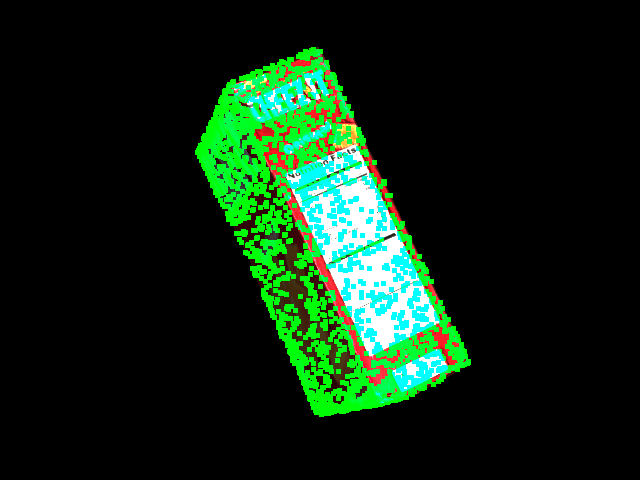

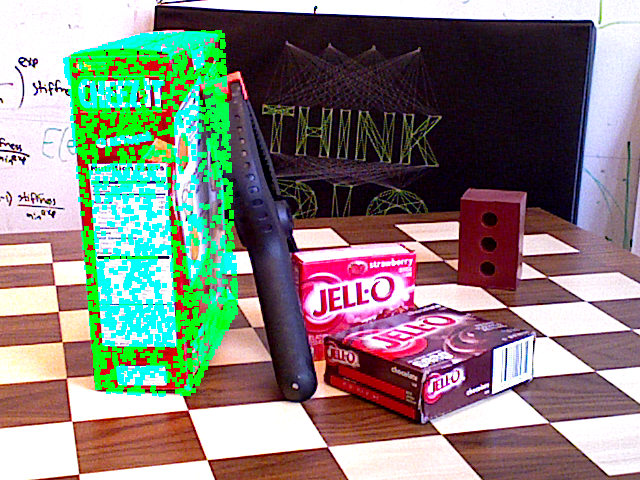

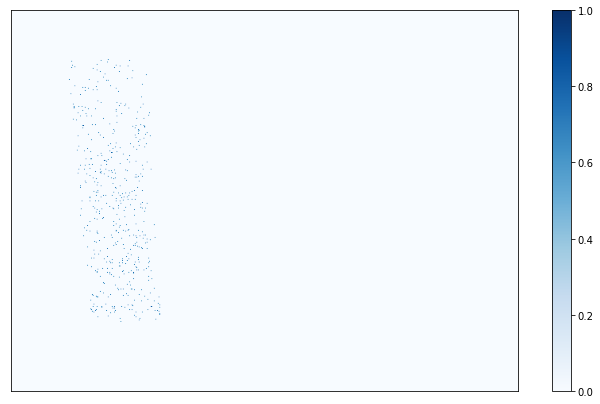

SHOW


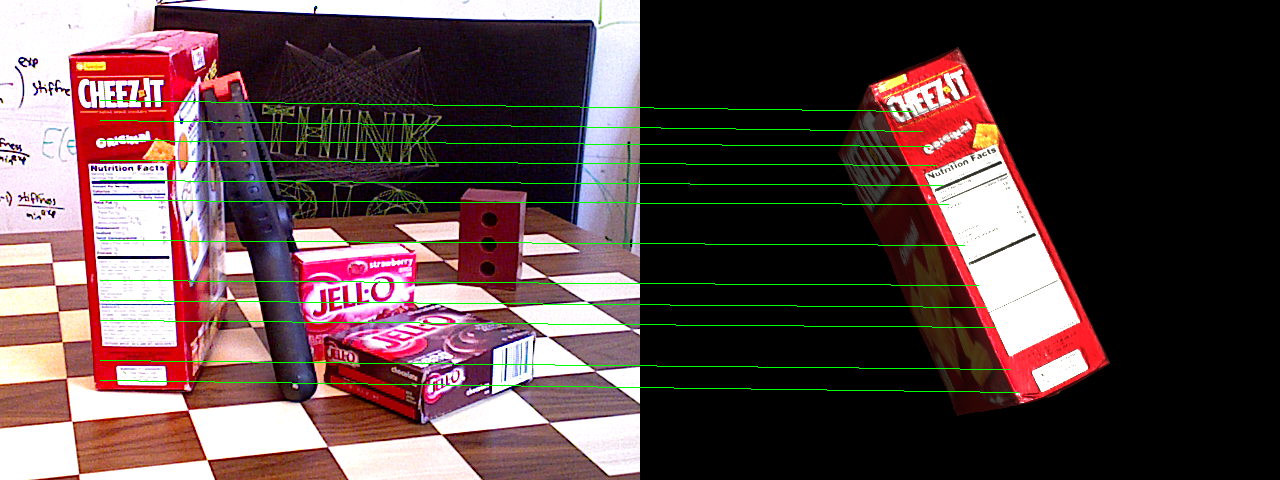

In [3]:

data = dataset_train._backend.mesh[2].vertices[::100,:]
h_render = h_render_in.numpy()[0]

# X-coordinate points downward in image 
# Y-coordingate points right in image

# plot_pcd( data )

data = transform_mesh(copy.deepcopy( data ), h_render)
K1 = dataset_train._backend.get_camera('data_syn/000001', K=True) #data/0068/000001

# img1 = np.uint8( render_img.permute(1,2,0).numpy()) #for cropped

img1 = np.uint8(render_img_original.numpy()[0])
visualizer.plot_estimated_pose(tag='',epoch=0,img =img1,points=data, K=K1 ,jupyter=True)

img2 = np.uint8(img_orig.numpy())

rot = R.from_quat(re_quat( copy.copy(gt_rot_wxyz) , 'wxyz') ).as_matrix()
h_real = np.eye(4)
h_real[:3,:3] = rot
h_real[:3,3] = gt_trans
data2 = dataset_train._backend.mesh[2].vertices[::100,:]
data2 = transform_mesh(copy.deepcopy( data2 ), h_real)
visualizer.plot_estimated_pose(tag='',epoch=0,img =img2,points=data2, K=K1 ,jupyter=True)

# display( Image.fromarray( img1 ) )
# display( Image.fromarray( img2 ) )

cor = np.zeros((h,w,1)) 
img3 =  copy.deepcopy( img1)
for j, ray in enumerate( render_res[1] ):
    w_,h_ = dataset_train._backend.nr_to_image_plane[ray]
    cor[int(h_),int(w_),:] = render_res[2][j]
cor2 = np.zeros((h,w,1)) 
img4 =  copy.deepcopy( img2)
for j, ray in enumerate( real_res[1] ):
    w_,h_ = dataset_train._backend.nr_to_image_plane[ray]
    cor2[int(h_),int(w_),:] = real_res[2][j]
      
# display( Image.fromarray( np.uint8(cor) ) )
# display( Image.fromarray( np.uint8(cor2) ) )         


comp_img = np.concatenate( [img2, img1], axis=1)
rep = np.repeat( cor[:,:,:],3,2) 
rep2 = np.repeat( cor2[:,:,:],3,2) 
map_img = Image.fromarray(np.uint8(rep))
map_img2 = Image.fromarray(np.uint8(rep2))
# comp_img = np.concatenate( [img2, map_img], axis=1)


comp_img = Image.fromarray(comp_img)
draw3 = ImageDraw.Draw(comp_img)
col = (0,255,0)

visu.disp_img_1d( mask_valid )
import cv2
inp = np.uint8( mask_valid*255 ) 
kernel = np.ones((10,10),np.uint8)
out_img = dilation = cv2.dilate(inp,kernel, iterations = 1)
grown = out_img != 0 
new_mask = grown * (label_img.numpy() == unique_desig[1])



for _w in range(0,w,100):
    for _h in range(0,h,20):       
        if new_mask[_h,_w] != 0:
#             try:
            uuu = u_full[_h,_w]
            vvv = v_full[_h,_w]

            draw3.line([(_w, _h), (int(_w +640+vvv ), _h + uuu)],
              fill=col, width=1)

                
#             except:
#                 pass
            
display( comp_img )
# dra= Drawer()
# dra.disp_img_1d(v_full, True)
# dra.disp_img_1d(u_full)
# dra= Drawer()
# dra.disp_img_1d( cor2[:,:,0],True )
# dra.disp_img_1d( cor[:,:,0] )




    
        

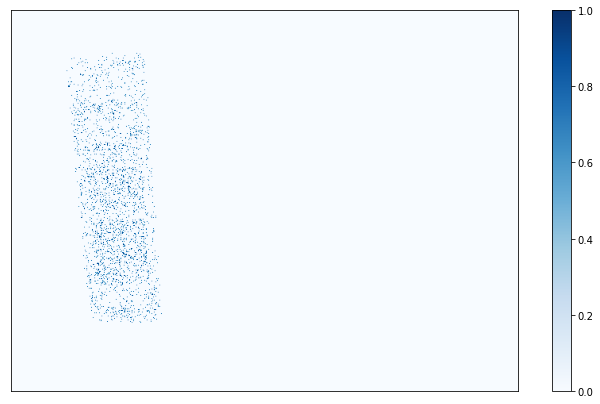

SHOW


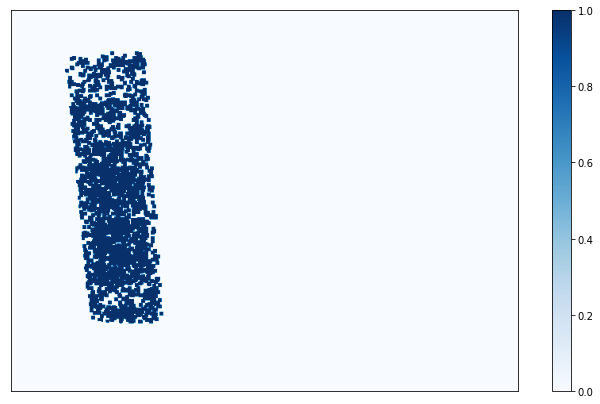

SHOW


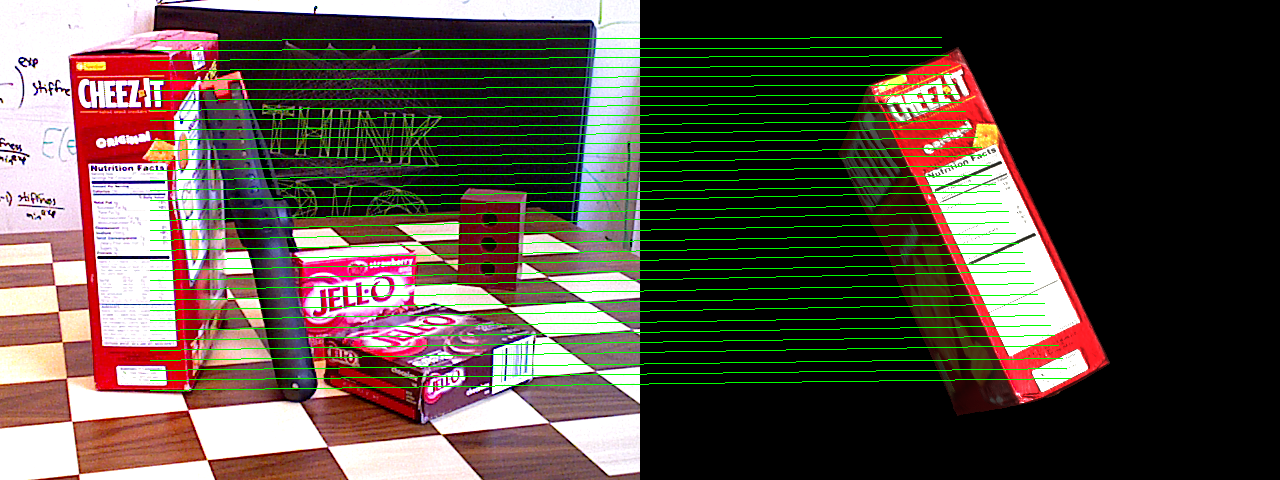

In [7]:
# visu.disp_img_1d(v_full, True)


visu.disp_img_1d( new_mask )
# for _w in range(0,w,100):
#     for _h in range(0,h,10):
#         if  cor2[_h,_w] != 0:
#             matches = cor == cor2[_h,_w]
#             uv = np.where(matches == True)
#             if uv[0].shape[0] != 0:
#                 __h, __w = uv[0][0] , uv[1][0]

#                 print('width:', uv[1],' ', _w)
#                 draw3.line([(_w, _h), (int(__w +640 ), __h)],
#                       fill=col, width=1)
                
display( comp_img )

[[-0.87466991  0.22379349 -0.42996404  0.        ]
 [ 0.39728698 -0.17719592 -0.90042472  0.        ]
 [-0.27769706 -0.95839351  0.06607769  0.69999999]
 [ 0.          0.          0.          1.        ]]


tensor([[[-0.8747,  0.2238, -0.4300,  0.0000],
         [ 0.3973, -0.1772, -0.9004,  0.0000],
         [-0.2777, -0.9584,  0.0661,  0.7000],
         [ 0.0000,  0.0000,  0.0000,  1.0000]]])